# Quantum Entanglement Swapping: Bell

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0. +0.j, 0.5+0.j],
            dims=(2, 2, 2, 2))


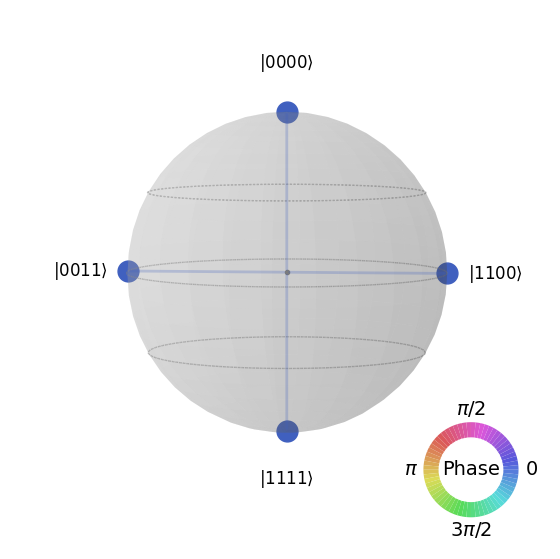

In [2]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Create a Bell state quantum circuit
cr=ClassicalRegister(2,'c')
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(2)
bell.cx(2, 3)
bell.barrier()

sv = Statevector([1,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
new_sv = sv.evolve(bell)

print(new_sv)
new_sv

plot_state_qsphere(new_sv)

#### Bell-State Measurement

To achieve the goal of entanglement swapping, we perform a Bell-state measurement on qubits B and C. This measurement projects the state of these two qubits into one of the four Bell states:

Original Circuit:
     ┌───┐      ░            ░ ┌───┐    ░            ░      ┌───┐ ░ ┌─┐   
  A: ┤ H ├──■───░────────────░─┤ X ├─■──░────────────░───■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐ ░      ┌───┐ ░ └─┬─┘ │  ░ ┌───┐      ░   │  └───┘ ░ └╥┘   
  B: ─────┤ X ├─░───■──┤ H ├─░───┼───■──░─┤ H ├──■───░───┼────────░──╫────
     ┌───┐└───┘ ░ ┌─┴─┐└───┘ ░   │      ░ └───┘┌─┴─┐ ░   │        ░  ║    
  C: ┤ H ├──■───░─┤ X ├──────░───■──────░──────┤ X ├─░───┼────────░──╫────
     └───┘┌─┴─┐ ░ └───┘      ░          ░      └───┘ ░ ┌─┴─┐      ░  ║ ┌─┐
  D: ─────┤ X ├─░────────────░──────────░────────────░─┤ X ├──────░──╫─┤M├
          └───┘ ░            ░          ░            ░ └───┘      ░  ║ └╥┘
c: 2/════════════════════════════════════════════════════════════════╩══╩═
                                                                     0  1 


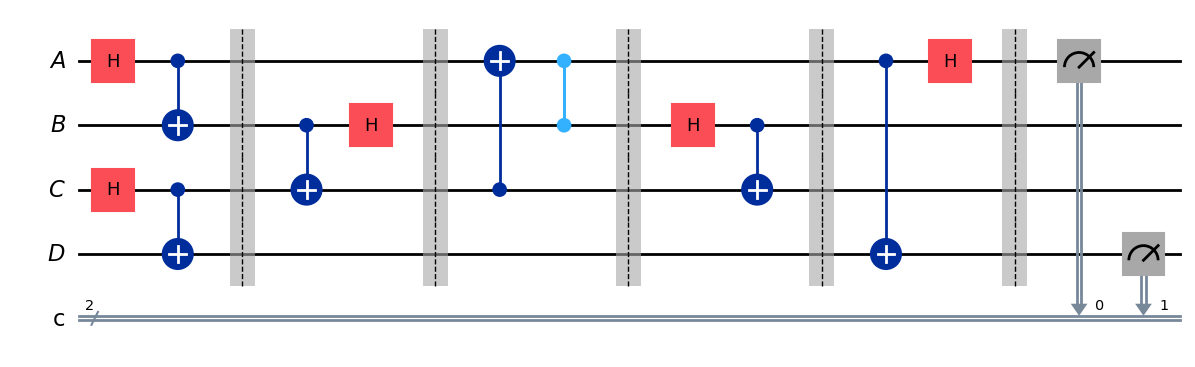

In [3]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(2)
bell.cx(2, 3)
bell.barrier()

# Bell measurement of 1 and 2
bell.cx(1,2)
bell.h(1)
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state
bell.cx(2, 0)
bell.cz(1, 0)
bell.barrier()

# reverce 1,2 to computational basis
bell.h(1)
bell.cx(1, 2)
bell.barrier()

# reverce 0,3 to computational basis
bell.cx(0,3)
bell.h(0)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")


#### Verify results

In [1]:
# Use the Sampler to simulate the circuit
sampler = Sampler()
job = sampler.run(circuits=bell, shots=1024)
result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
counts = result.quasi_dists[0].binary_probabilities()

# print result
print("Measuremet result:", result.quasi_dists[0])

# Plot the result as a histogram
plot_histogram(counts)

NameError: name 'Sampler' is not defined

#### Modify initial state

$ \vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Phi^+\rangle_{C\textcolor{orange}{D}}$ replaced with:

$$ \vert\Phi^+\rangle_{\textcolor{red}{A}B} = \frac{1}{\sqrt{2}}\left(\vert0+\rangle_{AB} + \vert1-\rangle_{AB}\right)$$

$$ \vert\Psi^+\rangle_{C\textcolor{orange}{D}} = \frac{1}{\sqrt{2}}\left(\vert0-\rangle_{AB} + \vert1+\rangle_{AB}\right)$$

the curcuit to achive $\vert\Phi^+\rangle_{\textcolor{red}{A}B}$ is below:

   ┌───┐          
A: ┤ H ├──■───────
   └───┘┌─┴─┐┌───┐
B: ─────┤ X ├┤ H ├
        └───┘└───┘
Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


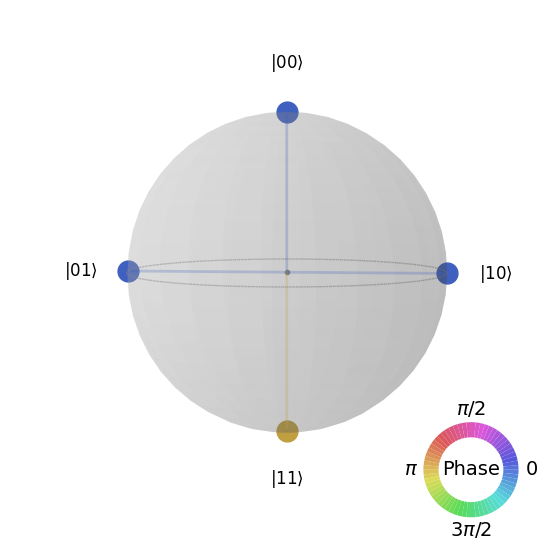

In [5]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))
bell.h(0)
bell.cx(0, 1)
bell.h(1)

sv = Statevector([1,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(new_sv)
plot_state_qsphere(new_sv)

the curcuit to achive $ \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

   ┌───┐     ┌───┐
A: ┤ H ├──■──┤ H ├
   └───┘┌─┴─┐├───┤
B: ─────┤ X ├┤ X ├
        └───┘└───┘
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


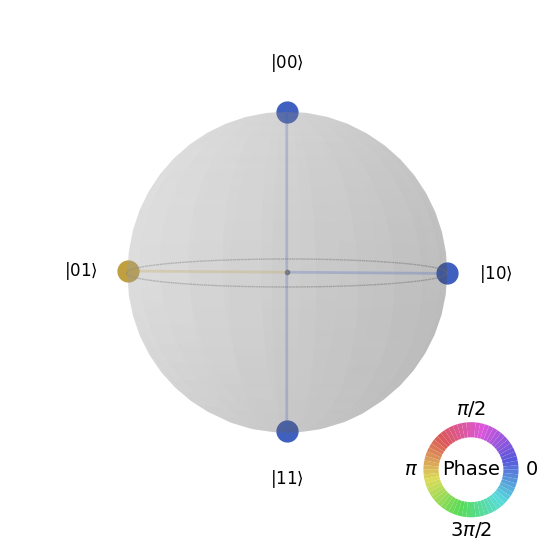

In [8]:
bell1 = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))#, QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)

bell1.h(0)
bell1.cx(0, 1)
bell1.x(1)
bell1.h(0)
# bell1.h(1)

sv1 = Statevector([1,0,0,0])
new_sv1 = sv1.evolve(bell)

print(bell)
print(sv1)
print(new_sv1)

plot_state_qsphere(new_sv1)

the curcuit to achive $\vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

     ┌───┐          
  A: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
  B: ─────┤ X ├┤ H ├
     ┌───┐└───┘├───┤
  C: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐├───┤
  D: ─────┤ X ├┤ X ├
          └───┘└───┘
c: 2/═══════════════
                    
Statevector([ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,
             -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
              0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
             -0.25+0.j],
            dims=(2, 2, 2, 2))


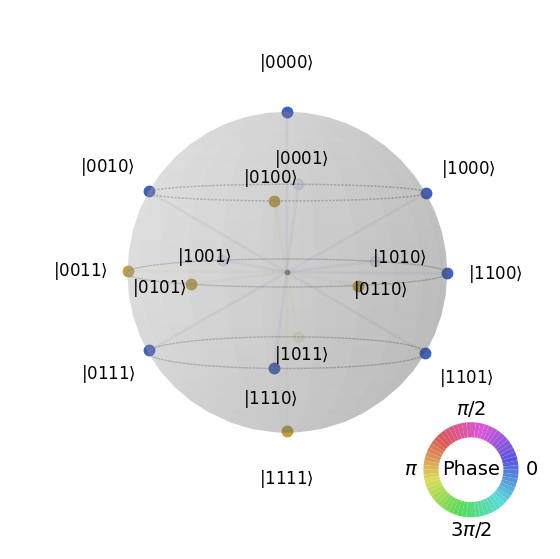

In [159]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(1)

bell.h(2)
bell.cx(2, 3)
bell.x(3)
bell.h(2)

sv = Statevector([1,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(new_sv)
plot_state_qsphere(new_sv)
#ew_sv

#### Running Entanglement Swapping circuit

Original Circuit:
     ┌───┐           ░            ░ ┌───┐    ░            ░      ┌───┐ ░ ┌─┐   
  A: ┤ H ├──■────────░────────────░─┤ X ├─■──░────────────░───■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐┌───┐ ░      ┌───┐ ░ └─┬─┘ │  ░ ┌───┐      ░   │  └───┘ ░ └╥┘   
  B: ─────┤ X ├┤ H ├─░───■──┤ H ├─░───┼───■──░─┤ H ├──■───░───┼────────░──╫────
     ┌───┐└───┘├───┤ ░ ┌─┴─┐└───┘ ░   │      ░ └───┘┌─┴─┐ ░   │        ░  ║    
  C: ┤ H ├──■──┤ H ├─░─┤ X ├──────░───■──────░──────┤ X ├─░───┼────────░──╫────
     └───┘┌─┴─┐├───┤ ░ └───┘      ░          ░      └───┘ ░ ┌─┴─┐      ░  ║ ┌─┐
  D: ─────┤ X ├┤ X ├─░────────────░──────────░────────────░─┤ X ├──────░──╫─┤M├
          └───┘└───┘ ░            ░          ░            ░ └───┘      ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════════════════════════╩══╩═
                                                                          0  1 


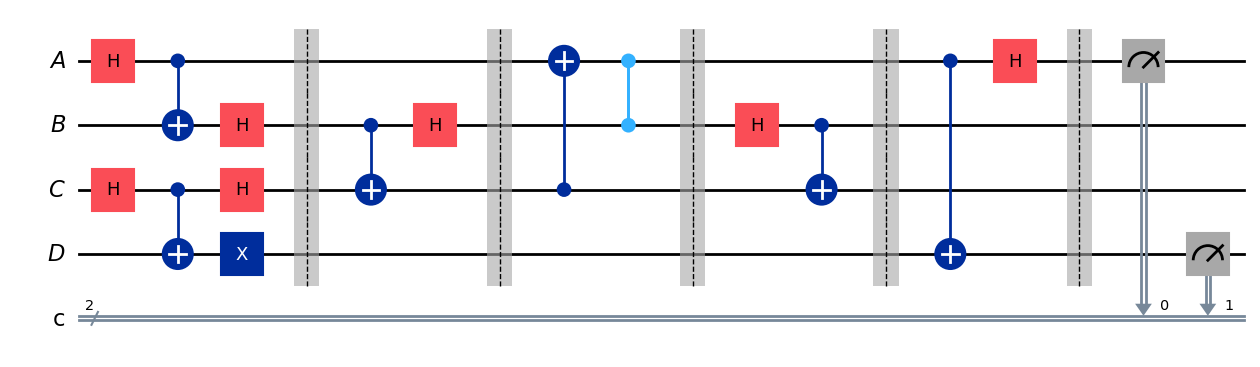

In [142]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(1)

bell.h(2)
bell.cx(2, 3)
bell.x(3)
bell.h(2)
bell.barrier()

# Bell measurement of 1 and 2
bell.cx(1,2)
bell.h(1)
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state
bell.cx(2, 0)
bell.cz(1, 0)
bell.barrier()

# reverce 1,2 to computational basis
bell.h(1)
bell.cx(1, 2)
bell.barrier()

# reverce 0,3 to computational basis
bell.cx(0,3)
bell.h(0)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")

#### Simulate results

Measuremet result: {1: np.float64(0.498046875), 2: np.float64(0.501953125)}


/var/folders/0t/km7c8b2x75j9d7rvg3qmbbw40000gn/T/ipykernel_20427/245224311.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


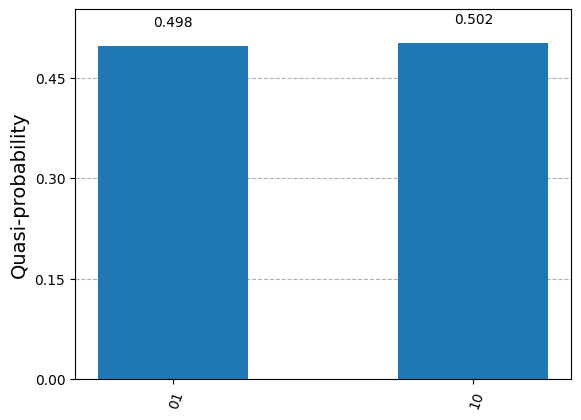

In [145]:
# Use the Sampler to simulate the circuit
sampler = Sampler()
job = sampler.run(circuits=bell, shots=1024)
result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
counts = result.quasi_dists[0].binary_probabilities()

# print result
print("Measuremet result:", result.quasi_dists[0])

# Plot the result as a histogram
plot_histogram(counts)

#### Entanglement Swapping with Non-Maximally Entangled States

   ┌─────────┐┌───┐┌───┐     
A: ┤ Rx(π/3) ├┤ S ├┤ X ├──■──
   └─────────┘└───┘└───┘┌─┴─┐
B: ─────────────────────┤ X ├
                        └───┘
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.5      +0.j, 0.       +0.j, 0.       +0.j, 0.8660254+0.j],
            dims=(2, 2))


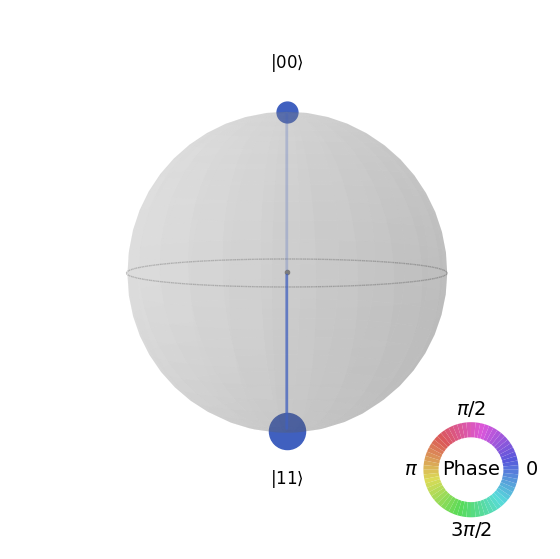

In [131]:
from numpy import sqrt, pi

bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))#, QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)

bell.rx(pi/3,0)
bell.s(0)
bell.x(0)

bell.cx(0, 1)

sv = Statevector([1,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(sv)
print(new_sv)

plot_state_qsphere(new_sv)

   ┌─────────┐┌───┐          
A: ┤ Rx(π/3) ├┤ S ├──■───────
   └─────────┘└───┘┌─┴─┐┌───┐
B: ────────────────┤ X ├┤ X ├
                   └───┘└───┘
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.       +0.j, 0.5      +0.j, 0.8660254+0.j, 0.       +0.j],
            dims=(2, 2))


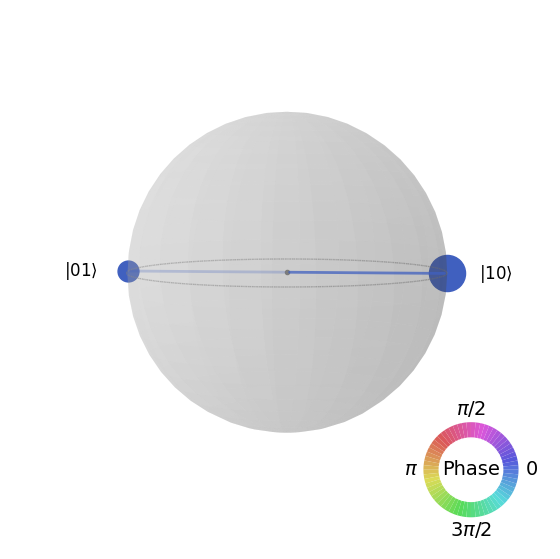

In [133]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))#, QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)

bell.rx(pi/3,0)
bell.s(0)
bell.cx(0, 1)
bell.x(1)

sv = Statevector([1,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(sv)
print(new_sv)

plot_state_qsphere(new_sv)